In [1]:
# Imports

In [2]:
import os
import shutil
import time
from tqdm import tqdm
import random

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import PIL.Image
from IPython.display import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets

# Visualizing and preparing data

In [3]:
class_dict = {0 : "safe driving",
              1 : "texting - right",
              2 : "talking on the phone - right",
              3 : "texting - left",
              4 : "talking on the phone - left",
              5 : "operating the radio",
              6 : "drinking",
              7 : "reaching behind",
              8 : "hair and makeup",
              9 : "talking to passenger"}

In [4]:
transform = transforms.Compose([transforms.Resize((400, 400)),
#                                  transforms.RandomRotation(10),
                                 transforms.ToTensor()
                               ])

In [5]:
# transform = transforms.Compose([transforms.Resize((400, 400)),
#                            transforms.RandomRotation(10),
#                            transforms.ToTensor(),
#                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                           ])

# Testing the model and submitting csv

In [6]:
model = models.resnet50()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.load_state_dict(torch.load("/Users/grandima/Desktop/Local/Personal/Observantai/model-driver", map_location=torch.device('cpu')))
model.eval()
model.cpu()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
path_test = "/Users/grandima/Desktop/Local/Personal/Observantai/test"
list_img_test = [img for img in os.listdir(path_test) if not img.startswith(".")]
list_img_test.sort()

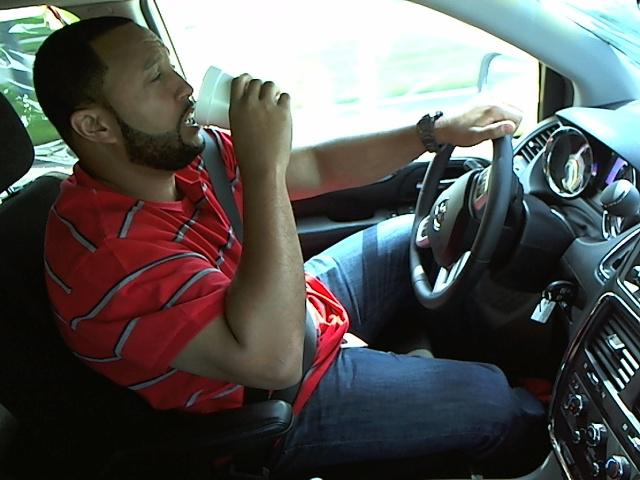

tensor([[[[0.2118, 0.2196, 0.2118,  ..., 0.7882, 0.1529, 0.1333],
          [0.2157, 0.2235, 0.2196,  ..., 0.8275, 0.2235, 0.2118],
          [0.2235, 0.2314, 0.2275,  ..., 0.8353, 0.3176, 0.3216],
          ...,
          [0.0353, 0.0353, 0.0353,  ..., 0.1255, 0.1569, 0.1451],
          [0.0353, 0.0353, 0.0353,  ..., 0.1373, 0.1490, 0.1373],
          [0.0353, 0.0353, 0.0353,  ..., 0.1647, 0.1765, 0.2353]],

         [[0.2549, 0.2627, 0.2549,  ..., 0.8235, 0.1882, 0.1686],
          [0.2588, 0.2667, 0.2627,  ..., 0.8784, 0.2863, 0.2745],
          [0.2667, 0.2745, 0.2706,  ..., 0.9216, 0.4157, 0.4314],
          ...,
          [0.0392, 0.0392, 0.0392,  ..., 0.1529, 0.1765, 0.1647],
          [0.0392, 0.0392, 0.0392,  ..., 0.1608, 0.1608, 0.1490],
          [0.0392, 0.0392, 0.0392,  ..., 0.1804, 0.1804, 0.2353]],

         [[0.2000, 0.2078, 0.2000,  ..., 0.8471, 0.2235, 0.2157],
          [0.2039, 0.2118, 0.2078,  ..., 0.8941, 0.3137, 0.3098],
          [0.2118, 0.2196, 0.2157,  ..., 0

In [8]:
file = random.choice(list_img_test)
im_path = os.path.join(path_test,file)
im1 = PIL.Image.open("/Users/grandima/Desktop/Local/Personal/Observantai/test/img_29.jpg")
display(im1)
im1 = transform(im1)
im1 = im1.unsqueeze(0)
print(im1)
output = model(im1.cpu())
proba = nn.Softmax(dim=1)(output)
proba = [round(float(elem),4) for elem in proba[0]]
print(proba)
print("Predicted class:",class_dict[proba.index(max(proba))])
# with PIL.Image.open(im_path) as im:
#     im = transform(im)
#     im = im.unsqueeze(0)
#     output = model(im.cpu())
#     proba = nn.Softmax(dim=1)(output)
#     proba = [round(float(elem),4) for elem in proba[0]]
#     print(proba)
#     print("Predicted class:",class_dict[proba.index(max(proba))])
#     print("Confidence:",max(proba))
#     proba2 = proba.copy()
#     proba2[proba2.index(max(proba2))] = 0.
#     print("2nd answer:",class_dict[proba2.index(max(proba2))])
#     print("Confidence:",max(proba2))